# Identification and Characterization of Wine Profiles through K-Means CLustering

DTSA 5510 Final Project

March 1, 2024

Rachel VanOsdol
___
**Unsupervised Learning Problem Description**

This project focuses on identifying and characterizing distinct wine profiles through k-means clustering. Such an analysis holds potential to offer valuable insights for wine production and marketing endeavors. For instance, comprehending the preferences of various consumer segments based on these identified wine profiles can guide decisions in product development, refining marketing strategies, and executing targeted promotions. The dataset consists of a various chemical properties from over 6000 wine samples, accompanied by quality ratings and color labels (red or white). Following clustering, the analysis extends to examining the correlations between wine profiles, quality ratings, and color classifications.
___

**Dataset Description**

* Number of entries (rows): 6497
* Number of features (columns): 14

Columns:

* **Unnamed 0:** Contains integrer values that were perhaps used as a sample ID. It is not relevant to the data analysis. 

* **fixed_acidity:** This represents the non-volatile acids in the wine, which are acids that do not evaporate readily.

* **volatile_acidity:** This indicates the amount of volatile acids in the wine, which can contribute to unpleasant aromas like vinegar.

* **citric_acid:** Citric acid is a type of weak organic acid commonly found in citrus fruits. In wine, it can contribute to acidity and freshness.

* **residual_sugar:** This column represents the amount of sugar remaining after fermentation stops, contributing to the wine's sweetness.

* **chlorides:** This indicates the amount of salt present in the wine, typically in the form of sodium chloride.

* **free_sulfur_dioxide:** Sulfur dioxide (SO2) is often added to wine as a preservative. This column represents the amount of SO2 that is not bound to other molecules and is free to react with other compounds.

* **total_sulfur_dioxide:** This column represents the total amount of sulfur dioxide in the wine, including both free and bound forms. It's an important parameter for assessing wine stability and shelf life.

* **density:** Density is the mass per unit volume of the wine. It can be influenced by various factors including sugar content and alcohol level.

* **pH:** pH is a measure of how acidic or basic the wine is. It's an important factor in determining the overall balance and stability of the wine.

* **sulphates:** This column represents the amount of sulfates present in the wine, which can contribute to its aroma and act as an antioxidant.

* **alcohol:** This indicates the alcohol content of the wine, typically expressed as a percentage by volume.

* **quality:** Quality is a subjective measure of the overall quality or rating of the wine, often determined by sensory evaluation. High values indicate high quality, while low values indicate low quality.

* **color:** This column indicates the color of the wine, which could be categorical values like 'red', 'white', etc.

This dataset is avaiable on Kaggle at https://www.kaggle.com/datasets/karimfadi/wine-quality-dataset

# Python Libraries

In [162]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computing
import math # For basic math operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For enhanced data visualization
from sklearn.model_selection import train_test_split # For splitting the data into training and testing subsets
from sklearn.cluster import KMeans # For K-means clustering
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.decomposition import PCA # For principal component analysis (PCA)
from sklearn.metrics import mean_squared_error # For calculating mean squared error
from statsmodels.stats.multicomp import pairwise_tukeyhsd # For Post-hoc test (Tukey's HSD)
from scipy.stats import f_oneway, chi2_contingency # For statistical tests (ANOVA, chi-square)
from sklearn.ensemble import RandomForestClassifier # For determining feature importance and predicting quality/color 
from sklearn.metrics import accuracy_score # For analyzing predicted results
from sklearn.metrics import confusion_matrix # For analyzing predicted results

# Importing Data

In [118]:
# Import data

# Define the file paths to the train and test data
path_data = "/Users/rachelvanosdol/Desktop/DTSA5510_Unsupervise_Algorithms_in_Machine_Learning/FinalProject/wine_data.csv"

# Use pandas to read the CSV files into DataFrames
df = pd.read_csv(path_data)

# Print the dataframe columns
print(df.columns)

Index(['Unnamed: 0', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'color'],
      dtype='object')


# Initial Data Inspection

In [119]:
# View the shape of the dataframe
print("Number of entries (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])

# View the features and first and last 5 entries
pd.concat([df.head(5), df.tail(5)]).T

Number of entries (rows): 6497
Number of features (columns): 14


,0,1,2,3,4,6492,6493,6494,6495,6496
Unnamed: 0,0,1,2,3,4,6492,6493,6494,6495,6496
fixed_acidity,7.4,7.8,7.8,11.2,7.4,6.2,6.6,6.5,5.5,6.0
volatile_acidity,0.7,0.88,0.76,0.28,0.7,0.21,0.32,0.24,0.29,0.21
citric_acid,0.0,0.0,0.04,0.56,0.0,0.29,0.36,0.19,0.3,0.38
residual_sugar,1.9,2.6,2.3,1.9,1.9,1.6,8.0,1.2,1.1,0.8
chlorides,0.076,0.098,0.092,0.075,0.076,0.039,0.047,0.041,0.022,0.02
free_sulfur_dioxide,11.0,25.0,15.0,17.0,11.0,24.0,57.0,30.0,20.0,22.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0,34.0,92.0,168.0,111.0,110.0,98.0
density,0.9978,0.9968,0.997,0.998,0.9978,0.99114,0.9949,0.99254,0.98869,0.98941
pH,3.51,3.2,3.26,3.16,3.51,3.27,3.15,2.99,3.34,3.26


In the table above, the first column lists all the features, and the subsequent columns show the first five and last five entries. Some features, such as total_sulfur_dioxide, are quite large compared to other features like volatile_acidity. This is evidence that feature scaling is most likely necessary before building a clustering model. 

In [120]:
# Examine the feature statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6497.0,3248.000000,1875.666681,0.00000,1624.00000,3248.00000,4872.00000,6496.00000
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


In [121]:
# Check feature data types
df.dtypes

Unnamed: 0                int64
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

The Scikit-learn implementation of K-means is specifically designed to handle continuous data, even though it is occasionally applied to categorical or boolean types. Fortunately, all the features in this dataset (excluding 'quality' and 'color') consist of continuous data.

In [122]:
# The number of entries for each wine color.
print("Entries for each wine color:")
print(df.color.value_counts().to_string())

# The distribution of quality values.
print("\nDistribution of quality values:")
print(df.quality.value_counts().sort_index().to_string())

Entries for each wine color:
white    4898
red      1599

Distribution of quality values:
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5


# Data Visualization and Cleaning

## Dropping Irrelevant Columns and Rows with Missing Data

In [123]:
# Drop irrelevant columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [124]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [125]:
# Drop rows with missing values
df.dropna(inplace=True)

## Feature and Wine Quality Distributions

In [126]:
# Create a function that generates a histogram
def plot_histogram(array, title, color):
    plt.figure(figsize=(15, 4))  # Increase figure size
    
    # Create histogram with specified range and bins
    plt.hist(array, bins=20, range=(np.min(array), np.max(array)), color=color, edgecolor='black', alpha=0.7)
    
    # Add vertical line for mean
    mean_value = np.mean(array)
    plt.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Add title and labels with larger font size
    plt.title(title, fontsize=20)
    plt.xlabel('Feature Value', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    
    # Set tick font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Show plot
    plt.show()

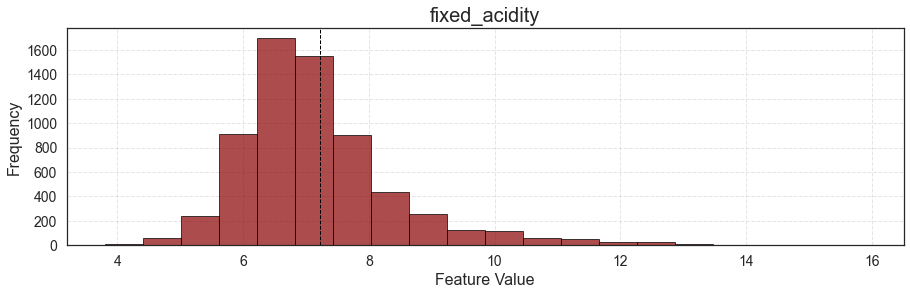

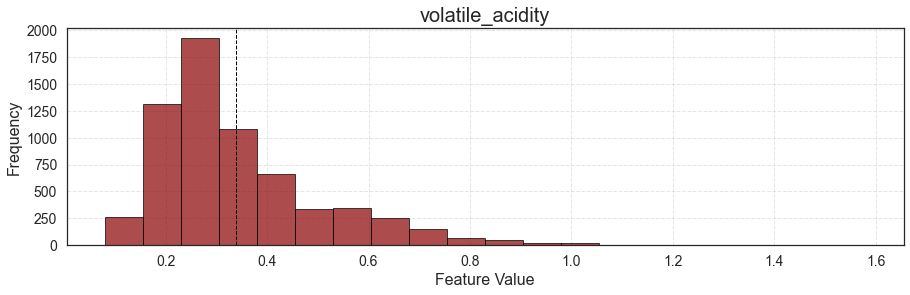

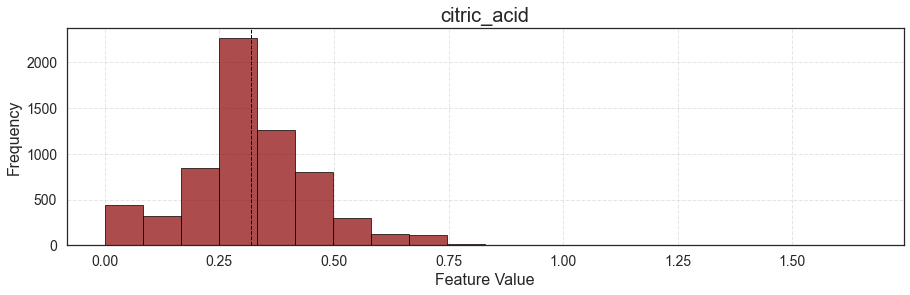

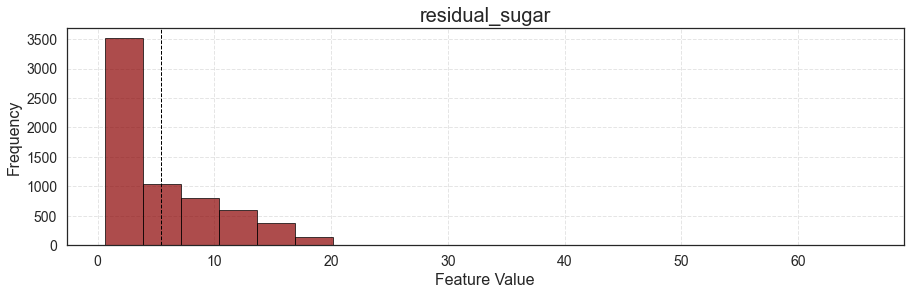

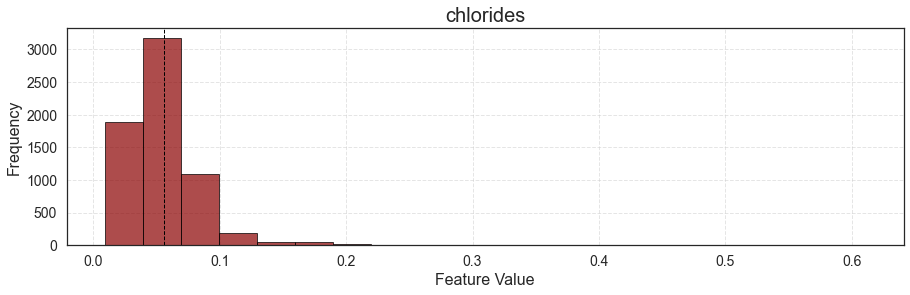

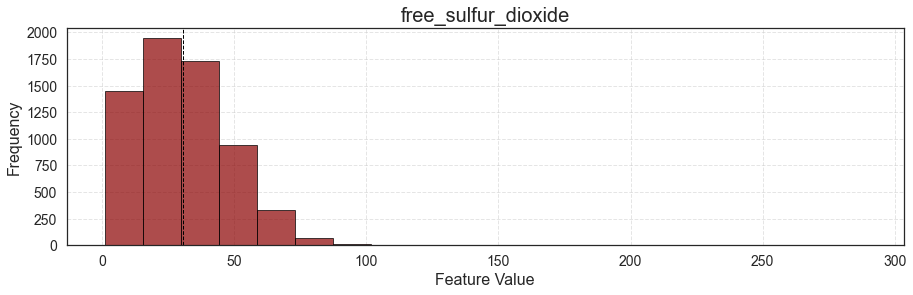

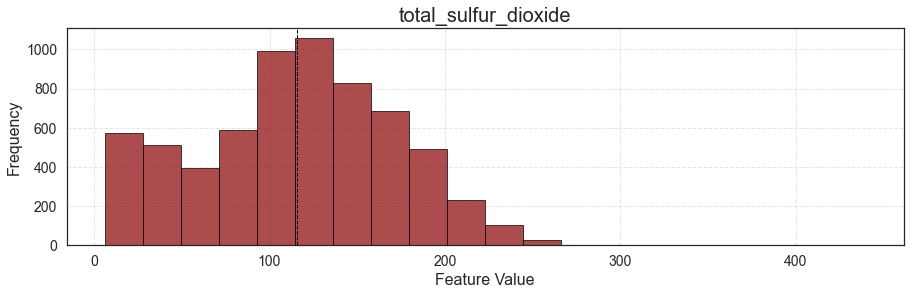

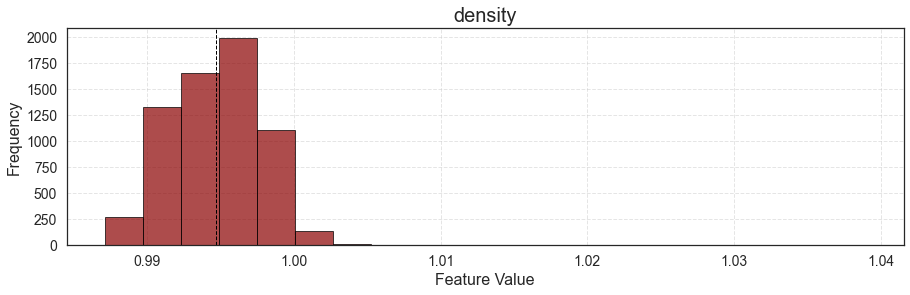

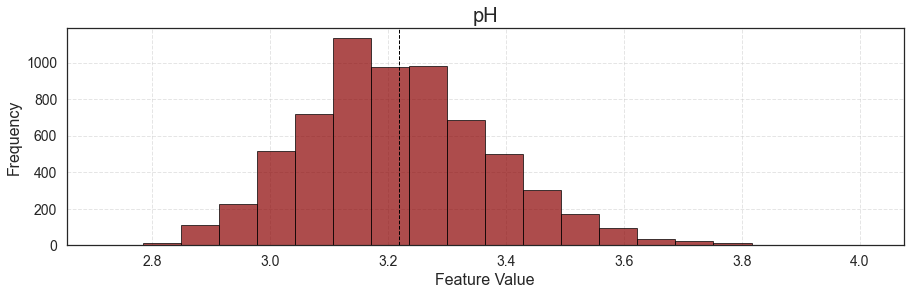

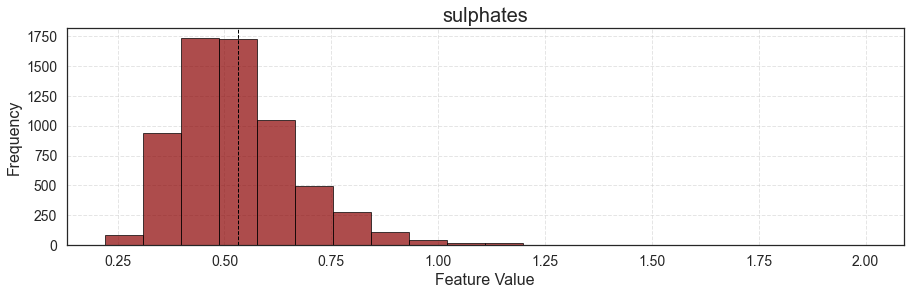

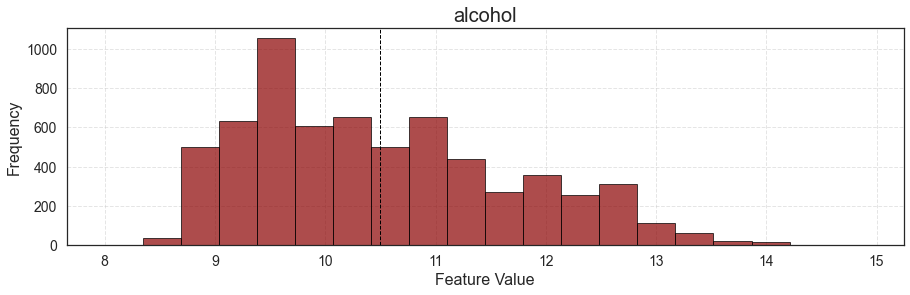

In [127]:
# Visualize feature distributions with histograms
for column in df.select_dtypes(include=['float64']):
    if column != 'color':
        plot_histogram(df[column], column, "#8B0000")

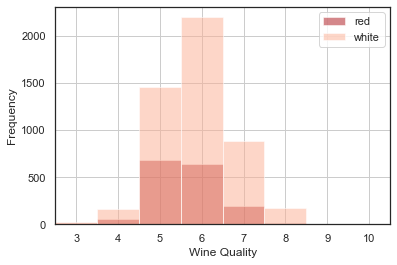

In [128]:
# Create a histogram of quality counts for red and white wines

# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

# custom colors
red = sns.color_palette("Reds")[5]  
pink = sns.color_palette("Reds")[1] 

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9, 10])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, pink]):
    q_data = df.loc[df.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    
ax.legend()
ax.set(xlabel='Wine Quality', ylabel='Frequency')
ax.set_xlim(3, 11)  
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range)
ax.grid(True) 

plt.show()

## Outliers

The presence of outliers can significantly affect K-means clustering. K-means clustering aims to partition data into clusters by minimizing the within-cluster sum of squares, which is sensitive to the distances between data points. Outliers, being data points that are significantly different from the majority of the data, can distort the cluster centroids and boundaries.

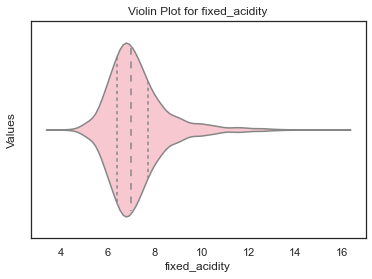

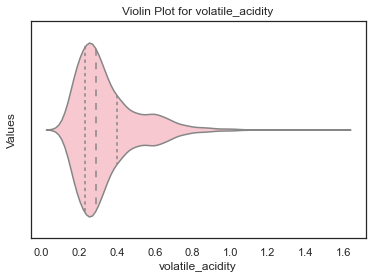

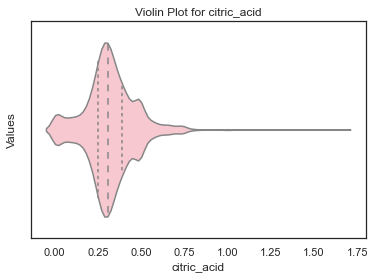

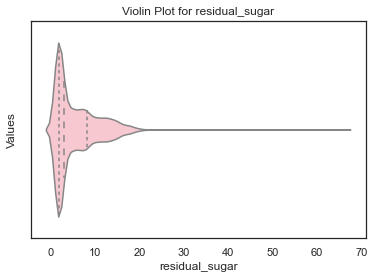

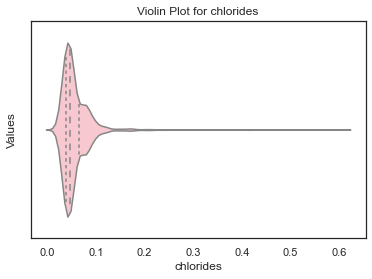

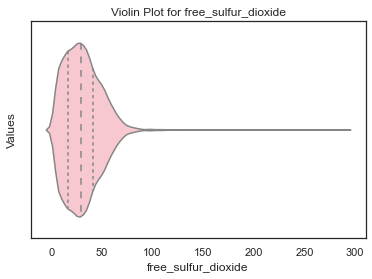

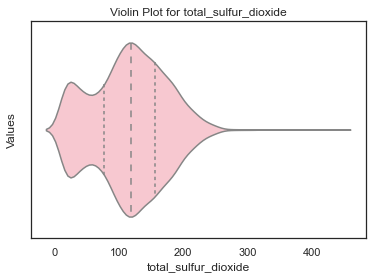

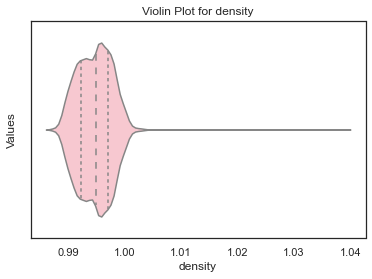

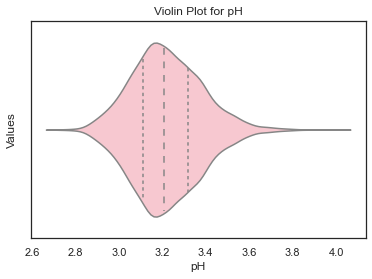

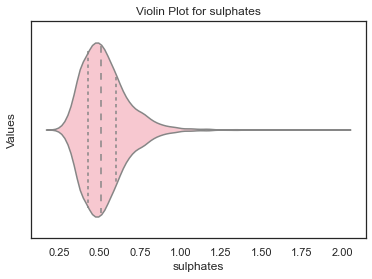

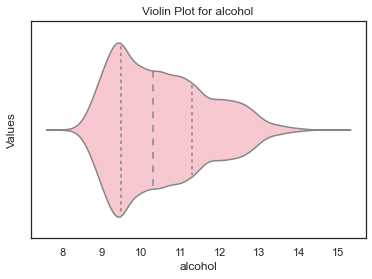

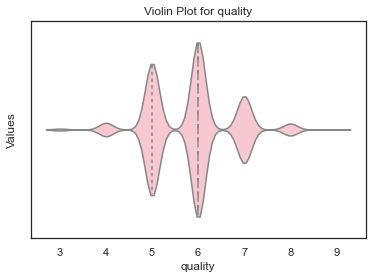

In [129]:
# Visualize feature distributions and outliers with violin plots

# Set the figure size
plt.figure(figsize=(6, 4))

# Loop through each column in the DataFrame
for column in df.columns:
    # Exclude the 'color' column if present
    if column != 'color':
        # Create a violin plot for the current feature
        sns.violinplot(x=df[column], color="pink", inner='quartiles')  # Set color and display quartiles as whiskers
        plt.title(f"Violin Plot for {column}")
        plt.xlabel(column)
        plt.ylabel("Values")
        plt.show()

Based on the violin plots above, there is definately evidence of skewness (more on that later) and possibly some outliers. So I created the following function to check for and remove data with values beyond 2 standard deviations from the mean.

In [130]:
# Function to remove outliers using Z-score method
def remove_outliers_zscore(data, threshold=2):
    z_scores = (data - np.mean(data)) / np.std(data)
    filtered_data = data[np.abs(z_scores) < threshold]
    return filtered_data

# Remove outliers from data
df_filtered = remove_outliers_zscore(df)
print("Number of outliers removed:", df.shape[0] - df_filtered.shape[0])

Number of outliers removed: 0


It appears that there are not any extreme outliers, so no data was removed. 

## Correlation Matrix

Highly correlated features can affect K-means clustering in several ways:
* Distortion of Cluster Shapes
* Unequal Contribution to Clustering
* Inflation of Cluster Separation Metrics
* Misinterpretation of Cluster Interpretation

So it is important to check for feature-feature correlation! 

In [131]:
# Define the wine red and white wine colors
wine_red = '#8B0000' 
white_wine = '#FFFFF0'  

# Create a custom color palette blending wine red to white wine
custom_palette = sns.blend_palette([wine_red, white_wine], n_colors=10)

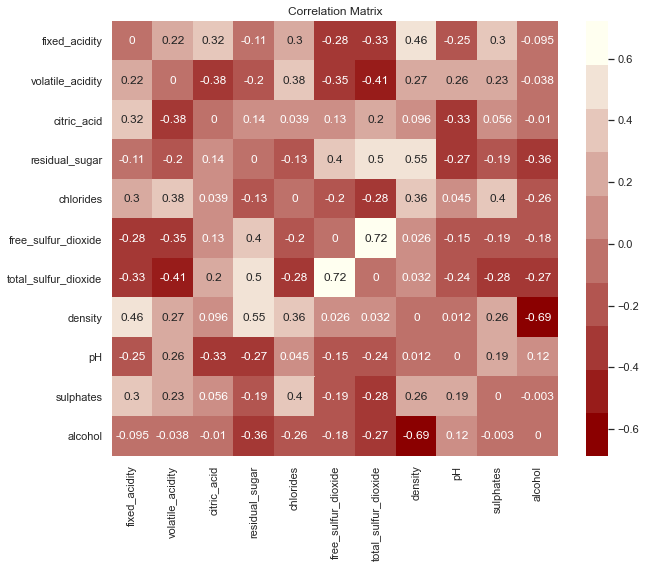

In [132]:
# Get the names of all numeric columns except 'color' and 'quality'
float_columns = [x for x in df.columns if x not in ['color', 'quality']]

# Compute the correlation matrix of the numeric columns
corr_mat = df[float_columns].corr()

# Set the diagonal values to 0 since they represent the correlation of a feature with itself
for x in range(len(float_columns)):
    corr_mat.iloc[x, x] = 0.0

# Plot the correlation matrix using a custom color palette
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap=custom_palette)
plt.title('Correlation Matrix')
plt.show()

There is apparently some correlation between features, but the only concerning correlation coefficient it the one for total_sulfur_dioxide and free_sulfur_dioxide. This makes sense since total_sulfur_dioxide is the sum of free_sulfur_dioxide and the bound sulfur dioxide.

Since these two features are so closely related, I will drop one of them. The free_sulfur_dioxide is in part captured by total_sulfur_dioxide, so I will drop the former before constructing the model. 

## Skewness

Skewed data can lead to unequal variances and biases in the clustering process, potentially resulting in suboptimal cluster assignments. Applying a log transform to skewed features can help equalize variances across different features and make the data more symmetrically distributed. This can improve the performance of k-means clustering by reducing the influence of outliers and ensuring that all features contribute equally to the clustering process.

In [133]:
# Computes kewness and sort in descending order 
skew_columns = (df.select_dtypes(include=['float64'])
                .skew()
                .sort_values(ascending=False))

# Selects columns where the skewness value is greater than 0.75.
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [134]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

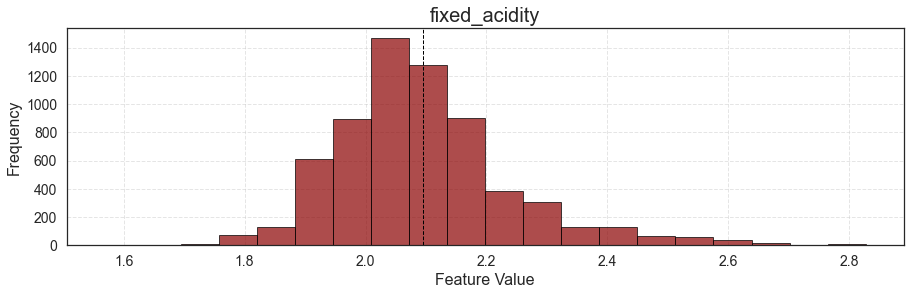

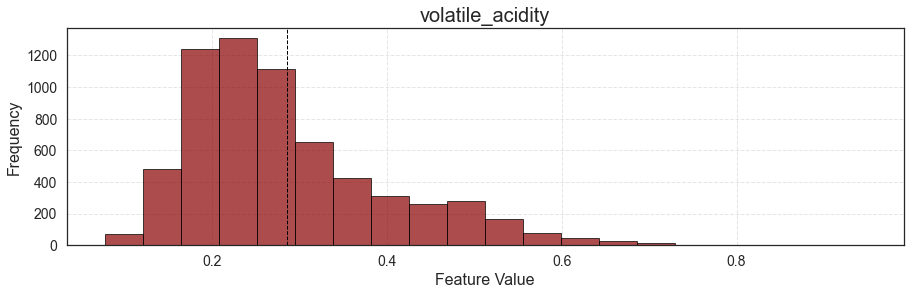

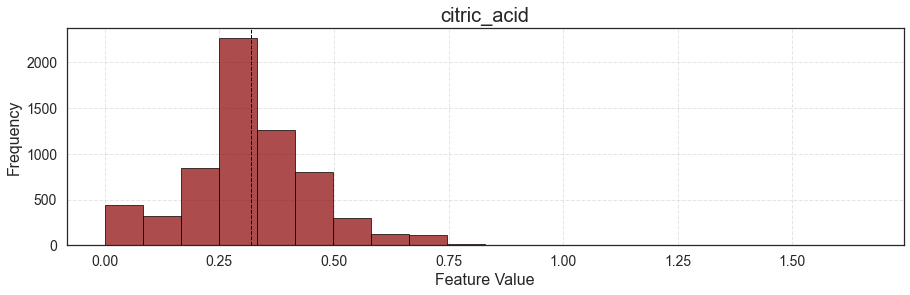

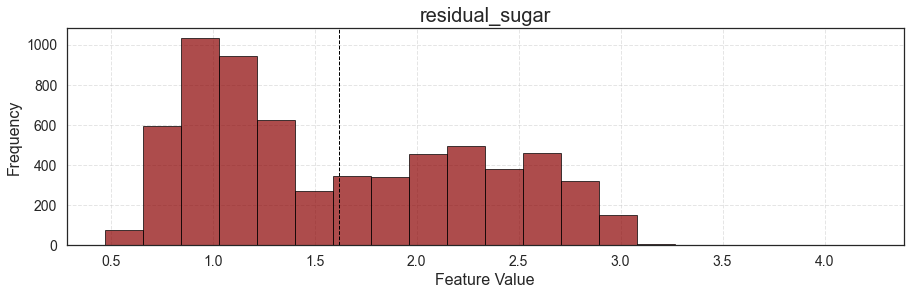

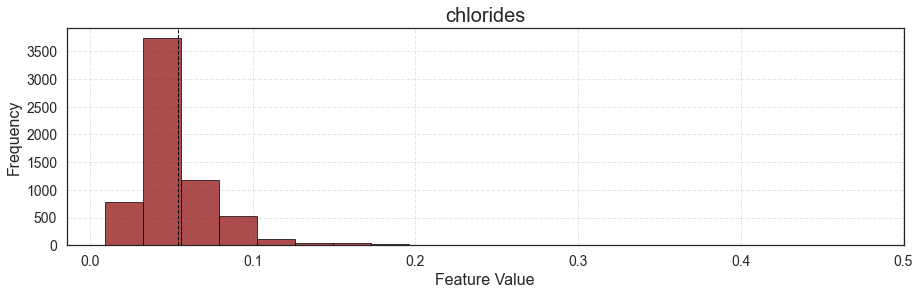

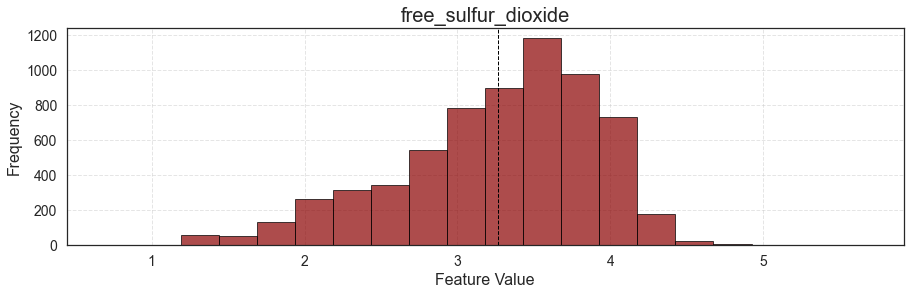

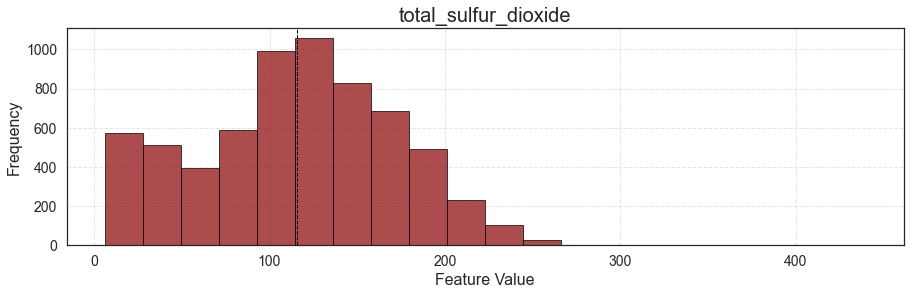

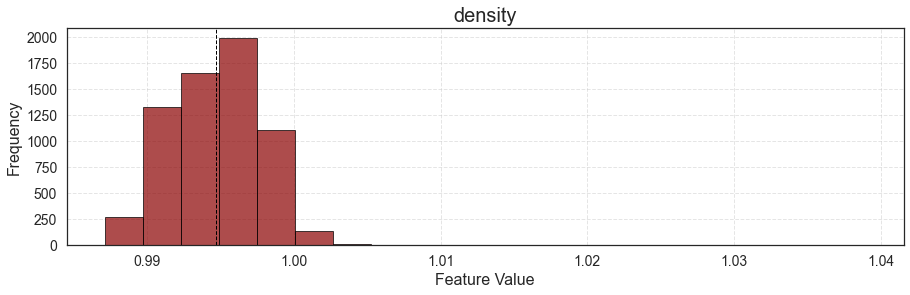

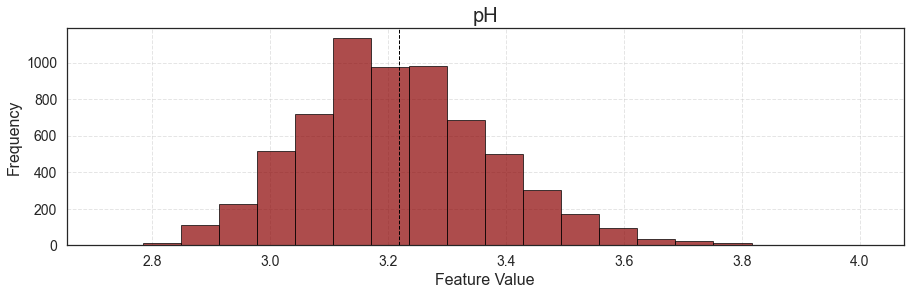

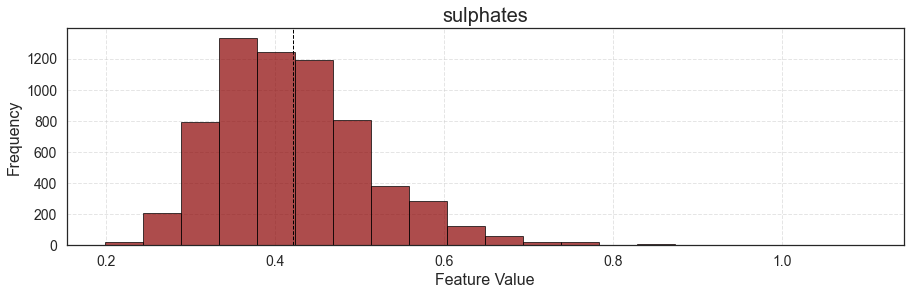

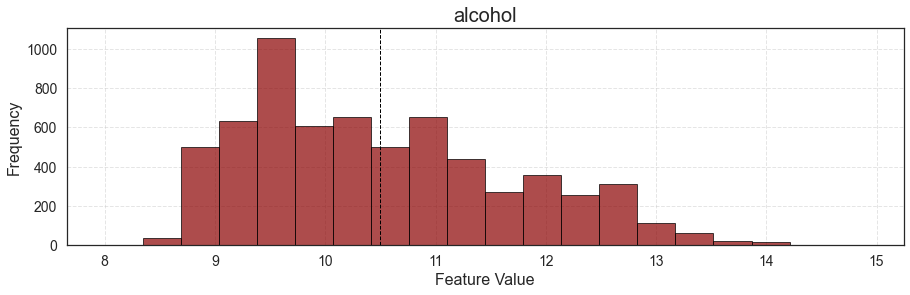

In [135]:
# Visualize feature distributions after log transform
for column in df.select_dtypes(include=['float64']):
    if column != 'color':
        plot_histogram(df[column], column, "#8B0000")

## Feature Scaling

Feature scaling is crucial before applying K-means clustering because it ensures that distances between data points and cluster centroids are computed accurately. Without scaling, features with larger scales may dominate the clustering process, resulting in biased cluster assignments. Scaling ensures all features contribute equally, improves convergence speed, and makes clusters more interpretable, leading to more accurate representations of underlying data patterns in K-means clustering.

In [136]:
# Perform feature scaling.
df[float_columns] = df.select_dtypes(include=['float64'])
df[float_columns] = StandardScaler().fit_transform(df[float_columns])

pd.concat([df.head(5), df.tail(5)]).T

,0,1,2,3,4,6492,6493,6494,6495,6496
fixed_acidity,0.229509,0.550261,0.550261,2.802728,0.229509,-0.83335,-0.46056,-0.551885,-1.538556,-1.027586
volatile_acidity,2.135767,3.012817,2.438032,-0.337109,2.135767,-0.827205,-0.068951,-0.61378,-0.269292,-0.827205
citric_acid,-2.192833,-2.192833,-1.917553,1.661085,-2.192833,-0.197054,0.284686,-0.885253,-0.128234,0.422326
residual_sugar,-0.815173,-0.498175,-0.62574,-0.815173,-0.815173,-0.975266,0.845168,-1.220179,-1.28838,-1.514375
chlorides,0.624554,1.281999,1.104012,0.594352,0.624554,-0.512071,-0.262922,-0.449604,-1.047945,-1.111574
free_sulfur_dioxide,-1.193601,-0.013944,-0.754684,-0.574982,-1.193601,-0.073783,1.210199,0.254413,-0.339794,-0.200998
total_sulfur_dioxide,-1.446359,-0.862469,-1.092486,-0.986324,-1.446359,-0.420128,0.924588,-0.083949,-0.101642,-0.313966
density,1.034993,0.701486,0.768188,1.101694,1.034993,-1.186161,0.067824,-0.719251,-2.003251,-1.763127
pH,1.81309,-0.115073,0.25812,-0.363868,1.81309,0.320319,-0.426067,-1.421248,0.75571,0.25812
sulphates,0.250355,1.059213,0.862549,0.389396,0.250355,-0.177723,-0.47273,-0.47273,-1.0878,-1.572973


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,5.276917e-15,1.000077,-3.629006,-0.644436,-0.106896,0.471461,5.049633
volatile_acidity,6497.0,-7.790529e-16,1.000077,-1.817681,-0.684343,-0.269292,0.443810,5.771086
citric_acid,6497.0,-1.753083e-16,1.000077,-2.192833,-0.472334,-0.059414,0.491146,9.231281
residual_sugar,6497.0,-1.921060e-16,1.000077,-1.687053,-0.866619,-0.343710,0.861368,3.783867
chlorides,6497.0,-7.564281e-16,1.000077,-1.463780,-0.543350,-0.262922,0.290773,13.734706
free_sulfur_dioxide,6497.0,3.034910e-15,1.000077,-3.927293,-0.574982,0.204386,0.717742,3.665722
total_sulfur_dioxide,6497.0,-9.658103e-16,1.000077,-1.941780,-0.685532,0.039907,0.712265,5.737257
density,6497.0,-4.487338e-15,1.000077,-2.530192,-0.785953,0.064489,0.764853,14.768791
pH,6497.0,3.086803e-15,1.000077,-3.100615,-0.674862,-0.052874,0.631312,4.923029
sulphates,6497.0,-4.666696e-15,1.000077,-2.432834,-0.699339,-0.105201,0.526688,7.387697


## Pair Plot 

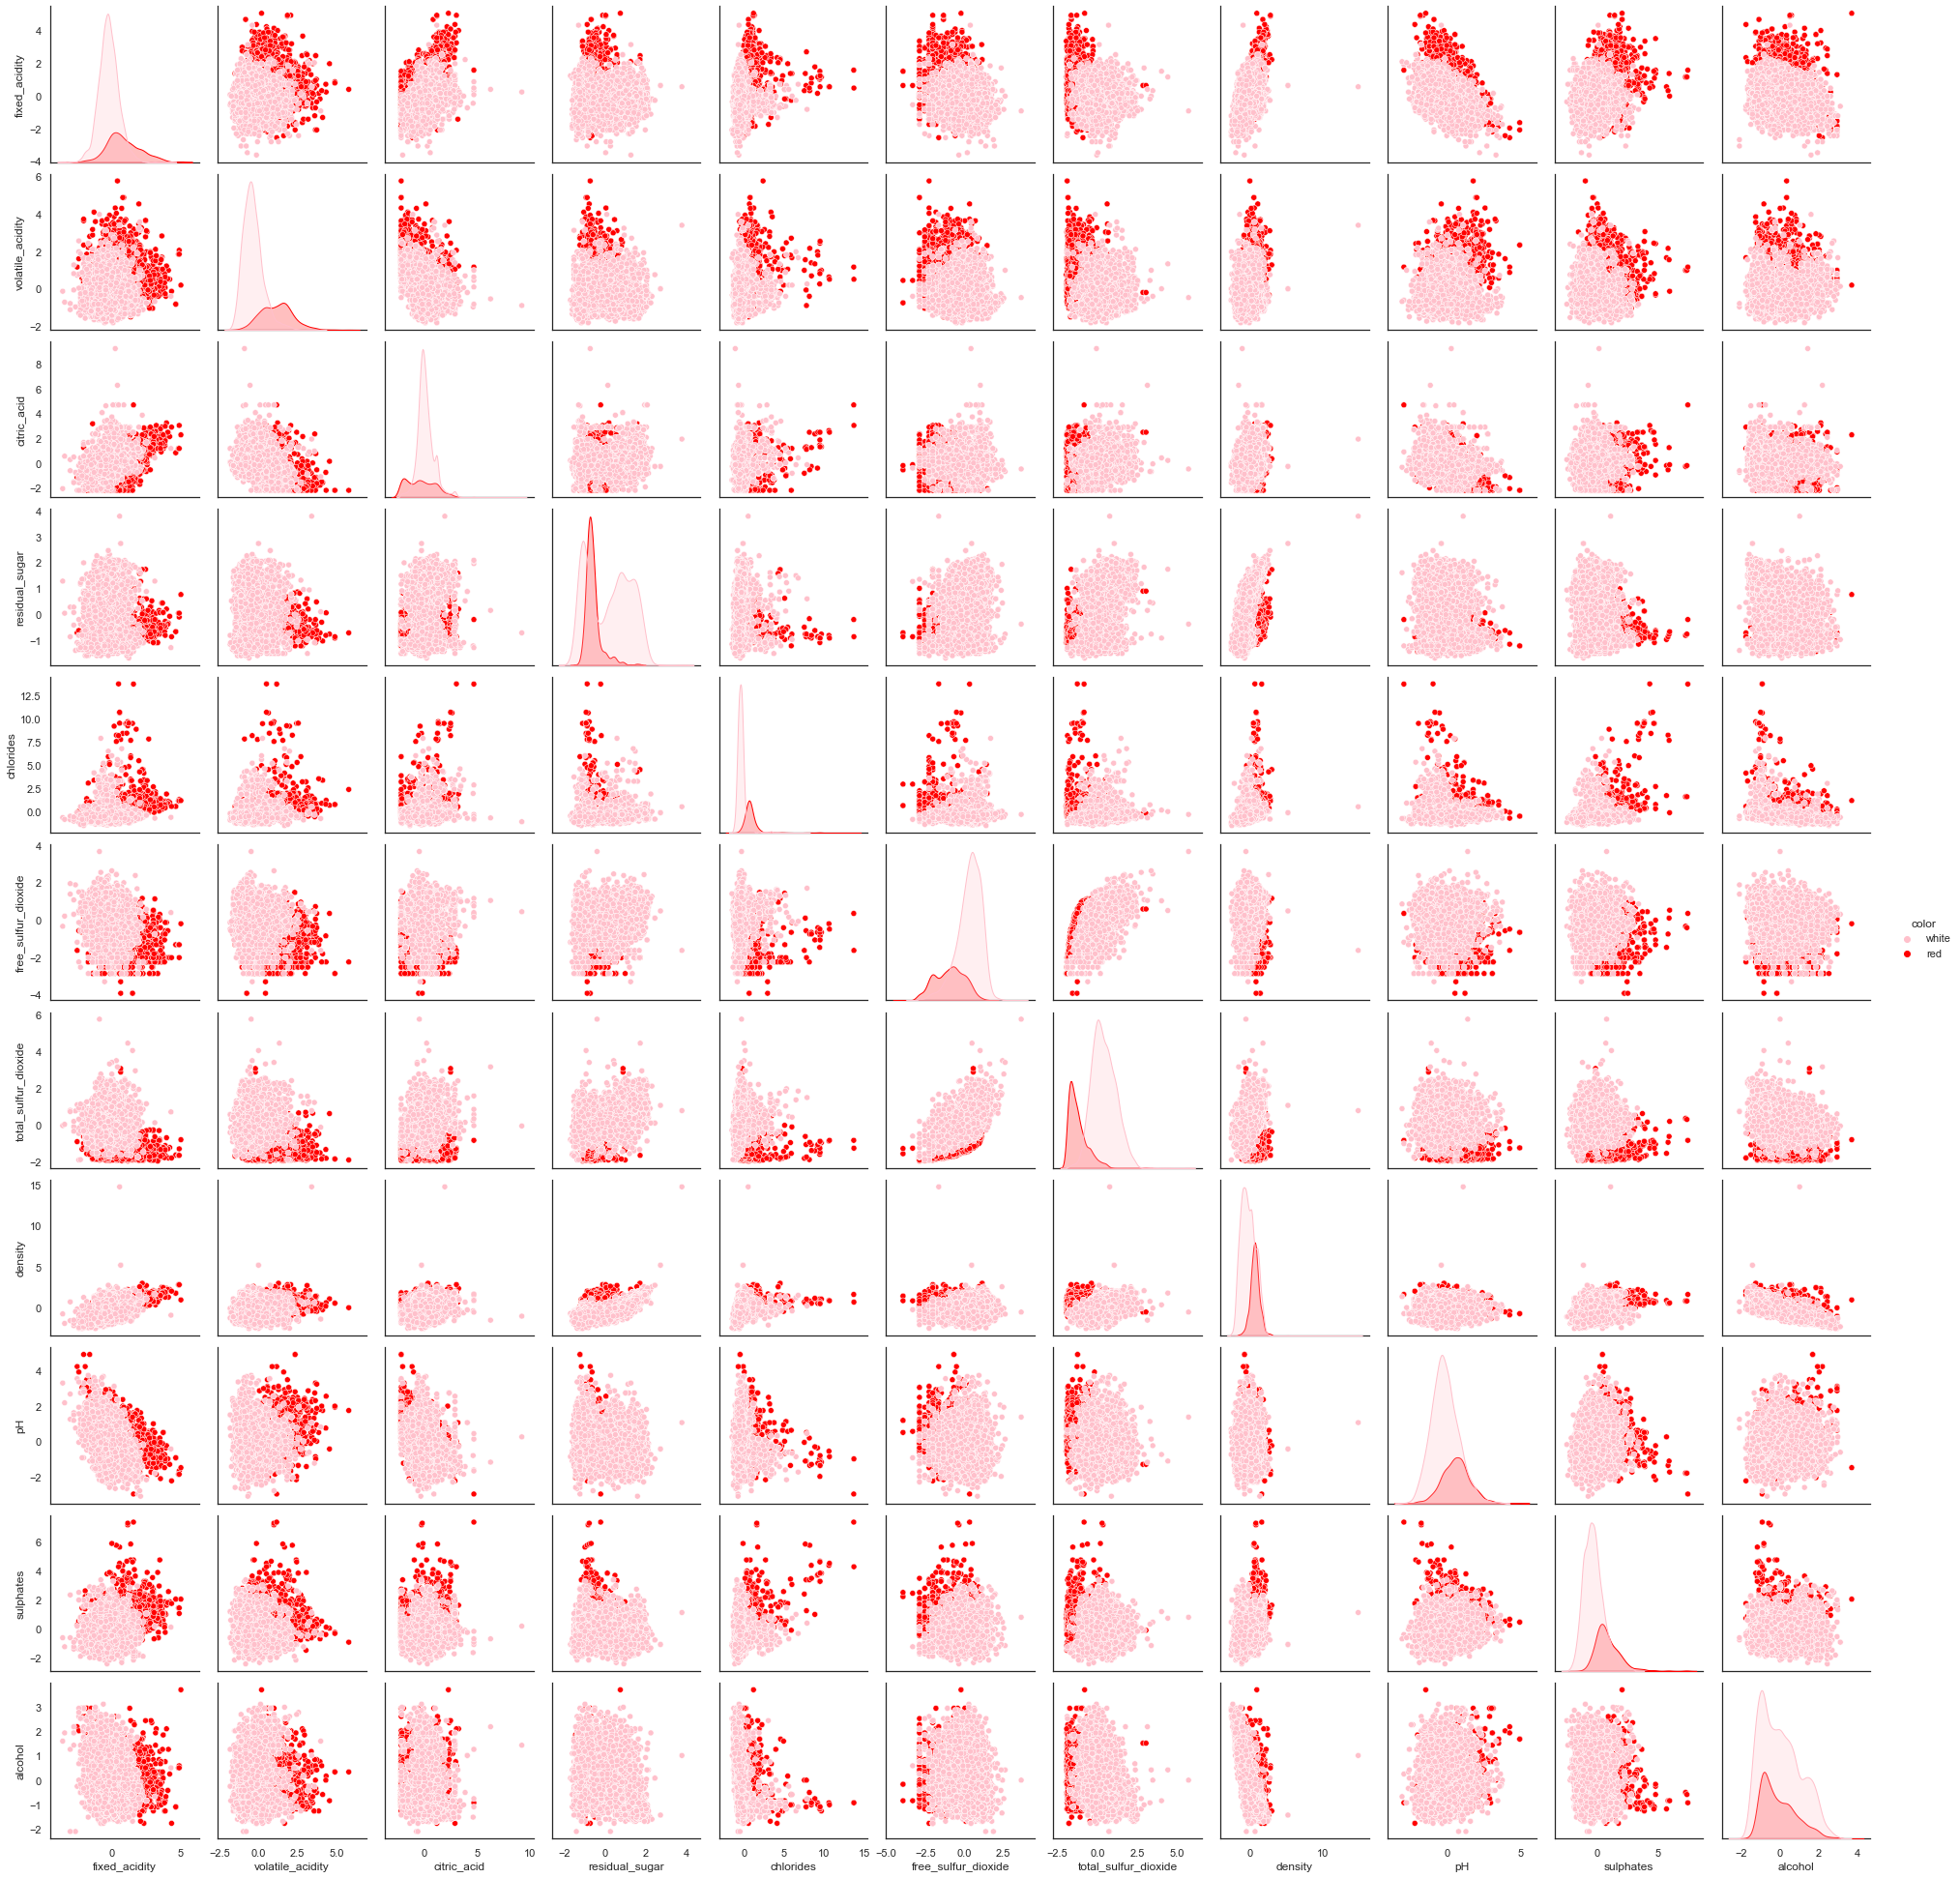

In [89]:
# Create a pairplot of the transformed and scaled features
sns.pairplot(df[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red': 'red', 'white': 'pink'})

This seems encouraging, as there is apparent clustering observed between red and white wines in most of the pairs plots. This suggests that the resulting clusters are likely to exhibit a preference for one color over the other.

## Feature Slection and Train/Test Split

In [138]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=3825)
print("Number or rows in the training data: ", df_train.shape[0])
print("Number or rows in the testing data: ", df_test.shape[0])

# Select relevant features for clustering
features = df_train.select_dtypes(include=['float64'])

# Remember that free_sulfur_dioxide should be dropped based on its correlation coef with total_sulfur_dioxide
#if 'free_sulfur_dioxide' in features_train.columns:
features = features.drop('free_sulfur_dioxide', axis=1)

print("\n", features.head().T)

Number or rows in the training data:  5197
Number or rows in the testing data:  1300

                           4205      4175      97        6300      4735
fixed_acidity         0.063358 -0.551885 -0.106896 -0.644436 -1.433288
volatile_acidity     -0.899525 -0.405457  1.045043  2.084354 -0.972449
citric_acid           0.284686  0.559966 -0.472334 -1.573453 -0.334694
residual_sugar       -0.539476  1.139364 -0.765471  0.778517 -1.435109
chlorides            -0.857802 -0.512071  0.442917 -0.356129 -0.480823
total_sulfur_dioxide  0.729958  1.968513 -1.658682  0.499941 -0.225498
density              -0.299033  0.374650  0.534733  0.034473 -1.479646
pH                    1.626493 -0.239471  0.195921  0.258120  1.750891
sulphates            -0.250731 -0.177723  0.729442 -1.087800 -1.008994
alcohol               0.090724 -0.915464 -1.083162 -0.328521  0.593818


# K-Means Clustering

An elbow curve aids in identifying the most suitable number of clusters (k) for a given dataset. It is constructed by plotting the number of clusters (k) on the x-axis and the within-cluster sum of squares (WCSS) on the y-axis. WCSS quantifies the total squared distances between each data point and the centroid of its respective cluster. The rationale behind selecting the number of clusters at the elbow point is to strike a balance between maximizing the number of clusters (and thus minimizing WCSS) and avoiding overfitting the data. Consequently, the elbow curve facilitates an informed decision regarding the optimal number of clusters for K-means clustering, managing the trade-off between the complexity and explanatory power of the clustering solution.

In [139]:
# Determine the best number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=3825)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

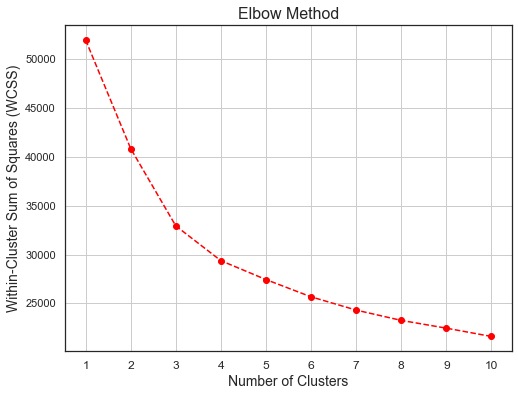

In [140]:
# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title('Elbow Method', fontsize=16) 
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14) 
plt.xticks(range(1, 11), fontsize=12)
plt.grid(True)
plt.show()

The difference between WCSS values when there are 1, 2, or 3 clusters is relatiely large compared to the difference between clusters of size 3 and more. Based on this, I will use 3 clusers moving forward. 

In [141]:
# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_train['cluster'] = kmeans.fit_predict(features)

<ipython-input-141-e0f8006a4385>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cluster'] = kmeans.fit_predict(features)


# Cluster Profiling

Principal component analysis (PCA) is used here to reduce the dimensionality of the data to two dimensions, making it easier to visualize the different clusters. 

<ipython-input-142-384026edd9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pca1'], df_train['pca2'] = pca.fit_transform(features).T


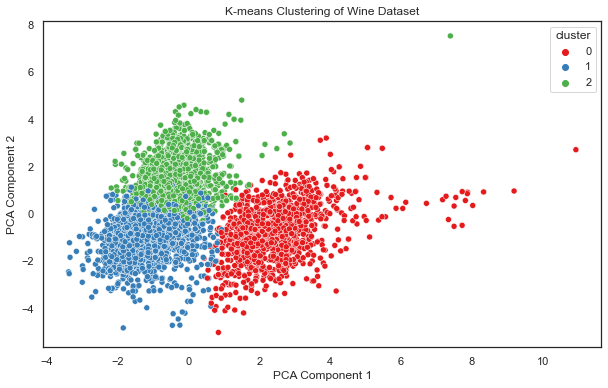

In [142]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
df_train['pca1'], df_train['pca2'] = pca.fit_transform(features).T

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='pca1', y='pca2', hue='cluster', palette='Set1', legend='full')
plt.title('K-means Clustering of Wine Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

The investigation of wine quality ratings distribution within each cluster involves analyzing summary statistics related to wine quality ratings for each cluster. This examination offers the opportunity to gain insights into potential associations between specific clusters and the prevalence of higher or lower quality wines.

In [143]:
# Analyze cluster distribution
cluster_counts = df_train['cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

Cluster Counts:
 1    2176
2    1778
0    1243
Name: cluster, dtype: int64


Based on the printed output of the cluster counts:
* Cluster 2 has the highest count with 2176 data points.
* Cluster 0 follows with 1778 data points.
* Cluster 1 has the lowest count with 1243 data points.

From this information, we can conclude that the data points are distributed among the clusters unevenly, with Cluster 2 having the most significant representation, followed by Cluster 0 and Cluster 1. This indicates that Cluster 2 may be more prevalent or representative in the dataset compared to the other clusters. 

In [144]:
# Analyze cluster characteristics
cluster_stats = df_train.groupby('cluster')[features.columns].agg(['mean', 'std', 'median', 'min', 'max'])

In [145]:
# Apply formatting to the DataFrame
styled_cluster_stats = cluster_stats.T.style.set_caption('Cluster Characteristics').format("{:.2f}")

# Add a separator between statistics for different features
styled_cluster_stats.set_table_styles([
    {'selector': 'th', 'props': [('border-bottom', '1px solid black')]},  # Add border to table header
    {'selector': 'td', 'props': [('border-right', '1px solid black')]}  # Add border to table cells
])

# Display the styled DataFrame
display(styled_cluster_means)

**Cluster Profiling**

* **Fixed Acidity:** Cluster 0 tends to have higher mean fixed acidity compared to Clusters 1 and 2.

* **Volatile Acidity:** Cluster 0 has higher mean volatile acidity compared to Clusters 1 and 2.

* **Citric Acid:** Cluster 1 has the highest mean citric acid content, while Cluster 0 has the lowest.

* **Residual Sugar:** Cluster 1 has the highest mean residual sugar content, while Cluster 0 has the lowest.

* **Chlorides:** Cluster 0 exhibits the highest mean chloride content, while Cluster 2 has the lowest.

* **Total Sulfur Dioxide:** Cluster 1 has the highest mean total sulfur dioxide content, followed by Cluster 2 and then Cluster 0.

* **Density:** Cluster 2 has the highest mean density, while Cluster 0 has the lowest.

* **pH:** Cluster 1 has the lowest mean pH, while Cluster 2 has the highest.

* **Sulphates:** Cluster 0 has the highest mean sulphate content, while Clusters 1 and 2 are almost identical.

* **Alcohol:** Cluster 2 has the highest mean alcohol content, while Cluster 1 has the lowest.

Cluster 0 wines have higher acidity and chloride content, along with lower residual sugar. Cluster 1 wines exhibit lower acidity and chlorides but higher residual sugar, citric acid, and total sulfur dioxide. Cluster 2 wines stand out with higher alcohol content and density, along with moderate levels of other attributes. These differences in wine profile across clusters suggest that the clustering algorithm has effectively segmented the dataset into groups with distinct wine characteristics.

# Relationship Between Clusters and Wine Quality Ratings

## Quality Distribution by Cluster

In [146]:
# Examine the quality distribution by cluster
quality_by_cluster = df_train.groupby('cluster')['quality'].value_counts(normalize=True).unstack()
print("Quality Distribution by Cluster:\n", quality_by_cluster.T)

Quality Distribution by Cluster:
 cluster         0         1         2
quality                              
3        0.007241  0.003676  0.004499
4        0.037812  0.029412  0.030371
5        0.440869  0.192096  0.409449
6        0.390185  0.448529  0.449944
7        0.114240  0.269301  0.088301
8        0.009654  0.055607  0.016873
9             NaN  0.001379  0.000562


The values in each cell represent the proportion of wines with a specific quality rating within each cluster.
For example, in Cluster 0, approximately 44.1% of wines have a quality rating of 5, 39.0% have a rating of 6, and 11.4% have a rating of 7. There are notable differences in the distribution of wine quality ratings among the clusters. For instance, Cluster 0 contains a diverse range of wine qualities but with a focus on ratings 5 to 7, Cluster 1 is characterized by a concentration of wines rated 6 and 7, and Cluster 2 exhibits a similar concentration of higher-rated wines but with a broader range of qualities, including a notable proportion of wines rated 5.

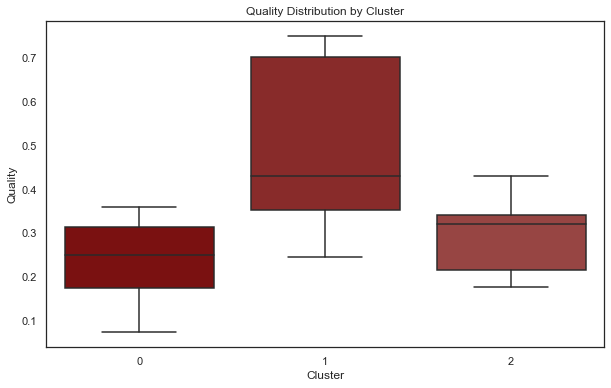

In [147]:
# Visualize the quality distributioni by cluster

# Examine the quality distribution by cluster
quality_by_cluster = df_train.groupby('quality')['cluster'].value_counts(normalize=True).unstack()

# Create a box and whisker plot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=quality_by_cluster, palette=custom_palette)
plt.title('Quality Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quality')
plt.show()

## ANOVA (Analysis of Variance)

ANOVA is used here to test for significant differences in mean quality ratings between clusters. ANOVA can help determine whether the differences in wine quality ratings observed among clusters are statistically significant.

In [148]:
# ANOVA to test for significant differences in mean quality ratings between clusters
anova_result = f_oneway(*(df_train[df_train['cluster'] == i]['quality'] for i in range(optimal_clusters)))
print("\nANOVA p-value:", anova_result.pvalue)


ANOVA p-value: 2.3046699242556742e-94


The p-value is substantially lower than 0.05, the commonly chosen threshold for significance level. This provides additional evidence against the null hypothesis, which posits no difference between clusters. It indicates that the observed variability in the data is improbable to result solely from random chance. This implies substantial disparities between the means of the groups, suggesting that the factors under comparison exert a notable influence on the dependent variable.

## Post-Hoc Test (Tukey's HSD) for Pairwise Comparisons Between Clusters

Tuky's HSD post-hoc test is used here to identify specific pairwise differences between clusters. This helps to pinpoint which clusters are significantly different from each other in terms of wine quality.

In [149]:
# Post-hoc tests (Tukey's HSD) for pairwise comparisons between clusters
tukey_results = pairwise_tukeyhsd(df_train['quality'], df_train['cluster'])
print("\n\nTukey's HSD Results:\n", tukey_results)



Tukey's HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.5274  0.001  0.4572  0.5976   True
     0      2   0.0447 0.3231 -0.0283  0.1177  False
     1      2  -0.4827  0.001 -0.5458 -0.4195   True
----------------------------------------------------


* The 'meandiff' column shows the difference in means between the two clusters being compared. For example, the mean difference between Cluster 0 and Cluster 1 is approximately 0.5274.
* The 'p-adj' column provides the adjusted p-value for each comparison after correcting for multiple comparisons. Adjusted p-values help control the family-wise error rate (FWER), which is the probability of making at least one Type I error across all comparisons.
* The 'lower' and 'upper' columns represent the lower and upper bounds of the confidence interval, respectively.The confidence interval provides a range within which the true mean difference between the clusters is likely to lie.
* The 'reject' column indicates whether the null hypothesis of no difference between the means of the compared clusters is rejected or not. If 'reject' is 'True', it means that there is a significant difference between the means of the compared clusters. If 'reject' is 'False', it means that there is no significant difference between the means of the compared clusters.

There is no significant difference in mean quality ratings between Cluster 0 and Cluster 2 (p-adj > 0.05).
However, there are significant differences between Cluster 0 and Cluster 1, as well as between Cluster 1 and Cluster 2 (p-adj < 0.05). The mean quality rating in Cluster 1 is higher than in Cluster 0 (likewise for clusters 2 and 0 respectively), as indicated by the positive mean differences and rejection of the null hypothesis. These results provide insights into which clusters have significantly different mean quality ratings and help identify any clusters that stand out in terms of quality.

## Feature Importance

The following code conducts feature importance analysis for each cluster using a Random Forest classifier to discern which features play a pivotal role in predicting wine quality within each cluster. Features exhibiting substantially higher importance in a particular cluster compared to others can be regarded as discriminatory features contributing significantly to the distinction of that cluster from the remainder.

In [150]:
# Extract features and target variable
X = df_train.drop(['quality', 'color', 'cluster', 'pca1', 'pca2'], axis=1)
y = df_train['quality']

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize an empty dictionary to store feature importances for each cluster
feature_importances_per_cluster = {}

# Iterate over clusters
for cluster_id in range(optimal_clusters):
    # Select data points belonging to the current cluster
    X_cluster = X[df_train['cluster'] == cluster_id]
    y_cluster = y[df_train['cluster'] == cluster_id]
    
    # Train Random Forest classifier on data points from the current cluster
    rf_classifier.fit(X_cluster, y_cluster)
    
    # Store feature importances for the current cluster
    feature_importances_per_cluster[cluster_id] = rf_classifier.feature_importances_

# Initialize an empty DataFrame to store feature importances for each cluster
result_df = pd.DataFrame(columns=X.columns)

# Print feature importances for each cluster
for cluster_id, feature_importances in feature_importances_per_cluster.items():
    # Create a new row in the DataFrame for the current cluster
    result_df.loc[f'Cluster {cluster_id}'] = feature_importances

# Display the resulting DataFrame
print("Feature Importances for Each Cluster:")
result_df.T

Feature Importances for Each Cluster:


,Cluster 0,Cluster 1,Cluster 2
fixed_acidity,0.072765,0.076407,0.076900
volatile_acidity,0.106561,0.090613,0.120161
citric_acid,0.074893,0.078548,0.088379
residual_sugar,0.071737,0.089978,0.094553
chlorides,0.084213,0.085106,0.088782
free_sulfur_dioxide,0.066318,0.106459,0.086399
total_sulfur_dioxide,0.102846,0.092858,0.090654
density,0.089154,0.100901,0.090052
pH,0.073863,0.087880,0.084962
sulphates,0.114237,0.087189,0.079415


**Observations**

* There is variation in the importance of features across different clusters. 

* Certain features such as 'alcohol', 'volatile_acidity', 'total_sulfur_dioxide', 'density', and 'sulphates' maintain relatively high importance across all clusters. These features seem to consistently contribute to predicting wine quality across different clusters.

* Distinctive Features for Each Cluster: Each cluster exhibits its own distinctive set of important features. For example, in Cluster 0, 'alcohol' appears to be the most important feature, while in Cluster 1, 'sulphates' and 'volatile_acidity' are relatively more important.

# Relationship Between Clusters and Wine Color

Chi-square test of independence is a statistical test used to determine whether there is a significant association between two categorical variables. The resulting p-value indicates the significance level of the association between the two variables. A low p-value suggests that the variables are dependent, meaning there is a significant relationship between wine color and the clusters obtained.

The following code performs a chi-square test of independence to examine the relationship wine color and the wine clusters.

In [152]:
# Chi-square test of independence for wine color and clusters
crosstab = pd.crosstab(df_train['color'], df_train['cluster'])
chi2, p, _, _ = chi2_contingency(crosstab)
print("\n\nChi-square p-value:", p)



Chi-square p-value: 0.0


The small p-value here indicates that the observed data is extremely unlikely under the null hypothesis. In other words, this is evidence of a significant relationship between wine color and the clusters obtained

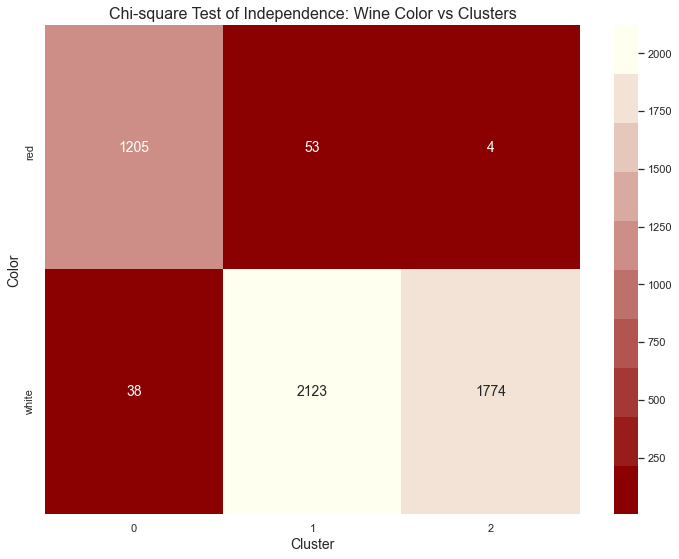

In [153]:
# Visualize the relationship between wine color and clusters
plt.figure(figsize=(12, 9))  # Increase figure size
sns.heatmap(crosstab, annot=True, cmap=custom_palette, fmt='d', annot_kws={"fontsize": 14}) 
plt.title('Chi-square Test of Independence: Wine Color vs Clusters', fontsize=16) 
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Color', fontsize=14)  
plt.show()

As predicted when examining the pairs plot, each cluster indeed seems to prefer a specific wine color. The majority of wine samples in cluster 0 are red, while the majority of samples in clusters 1 and 2 are white. 

# Predicting Wine Quality and Color within Clusters

In [163]:

def clusters_predictions(df_train, df_test, cluster):
    # df_train= cleaned dataframe with feature columns, target columns, and cluster columns
    # df_test = cleaned dataframe with feature columns, target columns, and cluster columns
    # cluster = integer value representing the specific to use cluster

    # Filter the data for the desired cluster
    cluster_train= df_train[df_train['cluster'] == cluster]
    cluster_test = df_test[df_test['cluster'] == cluster]

    # Separate features and labels
    X_train=cluster_train.drop(['quality', 'color', 'cluster', 'pca1', 'pca2'], axis=1)  # Features
    X_test = cluster_test.drop(['quality', 'color', 'cluster'], axis=1)  # Features
    y_quality_train=cluster_train['quality']  # Wine quality ratings
    y_quality_test = cluster_test['quality']  # Wine quality ratings
    y_color_train=cluster_train['color']  # Wine color labels
    y_color_test = cluster_test['color']  # Wine color labels
    
    # Initialize and train the Random Forest Classifier for predicting wine quality
    quality_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    quality_classifier.fit(X_train, y_quality_train)
    
    # Make predictions for wine quality
    quality_predictions_train= quality_classifier.predict(X_train)
    quality_predictions_test = quality_classifier.predict(X_test)

    # Calculate accuracy for wine quality predictions
    quality_accuracy_train= accuracy_score(y_quality_train,quality_predictions_train)
    quality_accuracy_test = accuracy_score(y_quality_test, quality_predictions_test)

    # Initialize and train the Random Forest Classifier for predicting wine color
    color_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    color_classifier.fit(X_train, y_color_train)

    # Make predictions for wine color
    color_predictions_train= color_classifier.predict(X_train)
    color_predictions_test = color_classifier.predict(X_test)

    # Calculate accuracy for wine color predictions
    color_accuracy_train = accuracy_score(y_color_train,color_predictions_train)
    color_accuracy_test = accuracy_score(y_color_test, color_predictions_test)

    return quality_predictions_train, quality_predictions_test, quality_accuracy_train, quality_accuracy_test, color_predictions_train, color_predictions_test, color_accuracy_train, color_accuracy_test

In [164]:
# Cluster the test data
df_test['cluster'] = kmeans.predict(features_test)

<ipython-input-164-7f1c795388df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cluster'] = kmeans.predict(features_test)


In [170]:
# Predict wine quality and color on cluster 0
q_pred_train0, q_pred_test0, q_acc_train0, q_acc_test0, c_pred_train0, c_pred_test0, c_acc_train0, c_acc_test0 = clusters_predictions(df_train, df_test, cluster=0)
q_pred_train1, q_pred_test1, q_acc_train1, q_acc_test1, c_pred_train1, c_pred_test1, c_acc_train1, c_acc_test1 = clusters_predictions(df_train, df_test, cluster=1)
q_pred_train2, q_pred_test2, q_acc_train2, q_acc_test2, c_pred_train2, c_pred_test2, c_acc_train2, c_acc_test2 = clusters_predictions(df_train, df_test, cluster=2)

# Get all the true 'quality' values for each cluster
q_true_train0= df_train.loc[df_train['cluster']== 0,'quality']
q_true_train1= df_train.loc[df_train['cluster']== 1,'quality']
q_true_train2= df_train.loc[df_train['cluster']== 2,'quality']
q_true_test0 = df_test.loc[df_test['cluster'] == 0, 'quality']
q_true_test1 = df_test.loc[df_test['cluster'] == 1, 'quality']
q_true_test2 = df_test.loc[df_test['cluster'] == 2, 'quality']

# Get all the true 'quality' values for each cluster
c_true_train0=df_train.loc[df_train['cluster']== 0, 'color']
c_true_train1=df_train.loc[df_train['cluster']== 1, 'color']
c_true_train2=df_train.loc[df_train['cluster']== 2, 'color']
c_true_test0 = df_test.loc[df_test['cluster'] == 0, 'color']
c_true_test1 = df_test.loc[df_test['cluster'] == 1, 'color']
c_true_test2 = df_test.loc[df_test['cluster'] == 2, 'color']

# Create confusion matrix for predicted quality
q_cm_train0= confusion_matrix(q_true_train0,q_pred_train0)
q_cm_train1= confusion_matrix(q_true_train1,q_pred_train1)
q_cm_train2= confusion_matrix(q_true_train2,q_pred_train2)
q_cm_test0 = confusion_matrix(q_true_test0, q_pred_test0)
q_cm_test1 = confusion_matrix(q_true_test1, q_pred_test1)
q_cm_test2 = confusion_matrix(q_true_test2, q_pred_test2)

# Create confusion matrix for predicted color
c_cm_train0= confusion_matrix(c_true_train0,c_pred_train0)
c_cm_train1= confusion_matrix(c_true_train1,c_pred_train1)
c_cm_train2= confusion_matrix(c_true_train2,c_pred_train2)
c_cm_test0 = confusion_matrix(c_true_test0, c_pred_test0)
c_cm_test1 = confusion_matrix(c_true_test1, c_pred_test1)
c_cm_test2 = confusion_matrix(c_true_test2, c_pred_test2)

In [173]:
# Print accuracy scores for the predicted quality - Cluster 0
print(f"Predicted quality ratings in the training dataset: {q_acc_train0}")
print(f"Predicted quality ratings in the testing dataset: {q_acc_test0} \n")

# Print confusion matrices for predicted quality - Cluster 0
print("Confusion Matrix for Predicted Quality \nTraining Data \nCluster 0")
print(q_cm_train0)
print("Confusion Matrix for Predicted Quality \nTest Data \nCluster 0")
print(q_cm_test0)

Predicted quality ratings in the training dataset: 1.0
Predicted quality ratings in the testing dataset: 0.7272727272727273 

Confusion Matrix for Predicted Quality 
Training Data 
Cluster 0
[[  9   0   0   0   0   0]
 [  0  47   0   0   0   0]
 [  0   0 548   0   0   0]
 [  0   0   0 485   0   0]
 [  0   0   0   0 142   0]
 [  0   0   0   0   0  12]]
Confusion Matrix for Predicted Quality 
Test Data 
Cluster 0
[[  0   0   2   0   0   0]
 [  0   1  10   5   1   0]
 [  0   0 121  19   1   0]
 [  0   0  24  96  10   0]
 [  0   0   3  11  22   0]
 [  0   0   0   1   3   0]]


In [ ]:
# Print confusion matrices for predicted quality - Cluster 1
print("Confusion Matrix for Predicted Quality \nTraining Data \nCluster 1")
print(q_cm_train1)
print("Confusion Matrix for Predicted Quality \nTest Data \nCluster 1")
print(q_cm_test1)

In [ ]:
# Print confusion matrices for predicted quality - Cluster 2
print("Confusion Matrix for Predicted Quality \nTraining Data \nCluster 2")
print(q_cm_train2)
print("Confusion Matrix for Predicted Quality \nTest Data \nCluster 2")
print(q_cm_test2)

In [ ]:
# Print confusion matrices for predicted color - Cluster 0
print("Confusion Matrix for Predicted Color \nTraining Data \nCluster 0")
print(c_cm_train0)
print("Confusion Matrix for Predicted Color \nTest Data \nCluster 0")
print(c_cm_test0)

In [ ]:
# Print confusion matrices for predicted color - Cluster 1
print("Confusion Matrix for Predicted Color \nTraining Data \nCluster 1")
print(c_cm_train1)
print("Confusion Matrix for Predicted Color \nTest Data \nCluster 1")
print(c_cm_test1)

In [ ]:
# Print confusion matrices for predicted color - Cluster 2
print("Confusion Matrix for Predicted Color \nTraining Data \nCluster 2")
print(c_cm_train2)
print("Confusion Matrix for Predicted Color \nTest Data \nCluster 2")
print(c_cm_test2)

In [177]:
# Accuracy of Predicted Wine Quality COlor

# Print accuracy scores for the predicted color - Cluster 0
print(f"Predicted color in the training dataset: {c_acc_train0}")
print(f"Predicted color in the testing dataset: {c_acc_test0} \n")

# Print accuracy scores for the predicted color - Cluster 1
print(f"Predicted color in the training dataset: {c_acc_train1}")
print(f"Predicted color in the testing dataset: {c_acc_test1} \n")

# Print accuracy scores for the predicted color - Cluster 2
print(f"Predicted color in the training dataset: {c_acc_train2}")
print(f"Predicted color in the testing dataset: {c_acc_test2} \n")

Predicted color in the training dataset: 1.0
Predicted color in the testing dataset: 0.990909090909091 

Predicted color in the training dataset: 1.0
Predicted color in the testing dataset: 0.994328922495274 

Predicted color in the training dataset: 1.0
Predicted color in the testing dataset: 0.9977324263038548 



In [182]:
print("Accuracy of Predicted Wine Quality Ratings \n")

data = [
    ["Cluster", "Training Accuracy", "Testing Accuracy"],
    ["Cluster 0", q_acc_train0, q_acc_test0],
    ["Cluster 1", q_acc_train1, q_acc_test1],
    ["Cluster 2", q_acc_train2, q_acc_test2]
]

# Find the maximum length of each column
max_lengths = [max(len(str(item)) for item in col) for col in zip(*data)]

# Define the format string
format_string = ' | '.join(['{{:<{}}}'.format(length) for length in max_lengths])

# Print the header
print(format_string.format(*data[0]))

# Print the separator
print('-' * sum(max_lengths + [len(max_lengths) - 1] * 3))

# Print the data rows
for row in data[1:]:
    print(format_string.format(*row))

Accuracy of Predicted Wine Quality Ratings 

Cluster   | Training Accuracy | Testing Accuracy  
--------------------------------------------------
Cluster 0 | 1.0               | 0.7272727272727273
Cluster 1 | 1.0               | 0.6465028355387523
Cluster 2 | 1.0               | 0.7437641723356009


Overall, the Random Forest Classifier model demonstrates high performance on the training data across all clusters, but its performance on unseen data varies slightly among different clusters, and is below 75% for each cluster, which is not ideal. This could be due to the variability of quality ratings within each cluster. The accuracy might be improved if the training data subset was larger, or by applying regularization techniques such as L1 or L2 regularization, which can prevent overfitting and improve model generalization.  

In [181]:
print("Accuracy of Predicted Wine Color \n")

data = [
    ["Cluster", "Training Accuracy", "Testing Accuracy"],
    ["Cluster 0", c_acc_train0, c_acc_test0],
    ["Cluster 1", c_acc_train1, c_acc_test1],
    ["Cluster 2", c_acc_train2, c_acc_test2]
]

# Find the maximum length of each column
max_lengths = [max(len(str(item)) for item in col) for col in zip(*data)]

# Define the format string
format_string = ' | '.join(['{{:<{}}}'.format(length) for length in max_lengths])

# Print the header
print(format_string.format(*data[0]))

# Print the separator
print('-' * sum(max_lengths + [len(max_lengths) - 1] * 3))

# Print the data rows
for row in data[1:]:
    print(format_string.format(*row))

Accuracy of Predicted Wine Color 

Cluster   | Training Accuracy | Testing Accuracy  
--------------------------------------------------
Cluster 0 | 1.0               | 0.990909090909091 
Cluster 1 | 1.0               | 0.994328922495274 
Cluster 2 | 1.0               | 0.9977324263038548


Across all clusters, the Random Forest Classifier model achieved perfect training accuracy, indicating an excellent fit to the training data. Additionally, the testing accuracy for each cluster is notably high, with values exceeding 99%. These results suggest that the model is highly effective in predicting wine color across all clusters.

# Conclusion

**Identification and Characterization of Wine Profiles** 

The analysis utilized K-means clustering, guided by the Elbow method, to categorize wine samples into three distinct clusters based on their chemical properties. Although the distribution of data points across clusters is somewhat uneven, with Cluster 2 being the most prevalent, this does not lead to excessive imbalance, and meaningful patterns emerged within each cluster. Clear distinctions were observed in mean, standard deviation, and range of characteristics across clusters. Cluster 0 wines have higher acidity and chloride content, along with lower residual sugar. Cluster 1 wines exhibit lower acidity and chlorides but higher residual sugar, citric acid, and total sulfur dioxide. Cluster 2 wines stand out with higher alcohol content and density, along with moderate levels of other attributes. These insights unveil unique compositional profiles for each cluster, offering valuable understanding of their respective wine characteristics.

**Wine Quality Across clusters** 


The cluster analysis reveals distinct patterns in wine quality ratings. Cluster 0 contains a diverse range of wine qualities but with a focus on ratings 5 to 7, Cluster 1 is characterized by a concentration of wines rated 6 and 7, and Cluster 2 exhibits a similar concentration of higher-rated wines but with a broader range of qualities, including a notable proportion of wines rated 5. Significant differences in group means are indicated by a small p-value from the ANOVA test, highlighting the substantial influence of compared factors on the dependent variable. Post-hoc analyses further emphasize differences in mean quality ratings, with Cluster 1 demonstrating higher ratings compared to Clusters 0 and 2. Feature importance analysis reveals variations in the relevance of features across clusters, indicating diverse patterns in feature importance for predicting wine quality. Despite the Random Forest Classifier model performing well on the training data for all clusters, its performance on unseen data varies slightly across clusters, underscoring the need for strategies such as increasing the size of the training data subset or implementing regularization techniques to enhance accuracy.

**Wine Color Across clusters** 

The Chi-square test of independence reveals a significant relationship between wine color and the obtained clusters, supported by a small p-value. The majority of wine samples in Cluster 0 are red, while Clusters 1 and 2 predominantly consist of white wine samples. Additionally, the Random Forest Classifier model exhibits exceptional performance, achieving perfect training accuracy across all clusters. Moreover, the model's testing accuracy surpasses 99% for each cluster, indicating its high efficacy in predicting wine color within the dataset.

# References

**General Information was obtained from:**

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2023). An Introduction to Statistical Learning with Applications in R (2nd ed.). Corrected Printing. Springer.

**The dataset was obtained from:**

Wine Quality Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/karimfadi/wine-quality-dataset

**Some coding snipets were obtained from:**

Fadi, Karmin. "Clustering Methods Unsupervised Learning." Kaggle, 2024, https://www.kaggle.com/code/karimfadi/clustering-methods-unsupervised-learning

**GitHub repo URL:** https://github.com/rvanosdol/WineProfilesKMeansClustering